In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import nan
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import csv
import io

___

In [2]:
df_raw = pd.read_csv('twitter-archive-enhanced.csv')
df_raw.head(1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
df_raw.set_index('tweet_id', inplace = True)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

___

In [5]:
# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# r.status_code
# r.headers['content-type']
# with open('image_predictions.tsv', 'wb') as f:
#     f.write(r.content)

In [6]:
df_predict_raw = pd.read_csv('image_predictions.tsv', sep = '\t')
df_predict_raw.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


___

In [7]:
# TWITTER_APP_KEY = ""
# TWITTER_APP_KEY_SECRET = ""
# TWITTER_ACCESS_TOKEN = ""
# TWITTER_ACCESS_TOKEN_SECRET = ""

# auth = tweepy.OAuthHandler(TWITTER_APP_KEY, TWITTER_APP_KEY_SECRET)
# auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

# list_tweepy=[]
# ids = list(df_raw.tweet_id)

# for tweets in ids:
#     try:
#         tweet = api.get_status(tweets)
#         retweet = tweet['retweet_count']
#         fav = tweet['favorite_count']
#         list_tweepy.append({'tweet_id':tweets,
#                             'retweet':retweet,
#                             'favorite':fav })
#     except:
#         continue


In [ ]:
# df_tweepy = pd.DataFrame(list_tweepy)
# df_tweepy.to_csv('tweet_json.txt')
# df_tweepy.set_index('tweet_id', inplace = True)
# df_tweepy.head(1)

In [8]:
df_tweepy = pd.read_csv('tweet_json.txt')

## Assessing The Data:


### Quality Issues:
After a quick visual assessment it was clear that were some columns and values that did not belong. Since one of the criteria from the key points was to limit data to original tweets, the following columsn are suspect.
- 78 values for  'in_reply_to_status_id'
- 78 values for  'in_reply_to_user_id'
- 181 values for 'retweeted_status_id'
- 181 values for 'retweeted_status_user_id'
- 181 values for 'retweeted_status_timestamp'
- The 'timestamp' column is no t a datetime object
- Tweets with images and Tweets without images
- Types of dogs values say 'None' value should be 'Null'
- Observations containing retweets
- Accuracy of image predction/classifications
- Pandas tries to truncate twitter ids.


### Tidiness Issues:
After doing a visual assessment on the sets of data from the twitter-archive-enhanced and image_predictions. It was clear that there were a couple variable columns that could be condensed.
- rating numerator and rating denomninator could be reduced
- Doggo, Floofer, Puppo, Pupper columns could be condensed
- Tables could be merged based on unique tweet ids

In [9]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.0f}'.format

## Cleaning the Data:

### 'twitter-archive-enhanced.csv' 

#### Define
Creating singular scoring column based on numerator and denominator columns.
#### Code

In [10]:
df_raw['score'] = 100 * (df_raw['rating_numerator'] / df_raw['rating_denominator'])

#### Test

In [11]:
df_raw.head(1)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,130


#### Define
Removing ReTweet observations.
#### Code

In [12]:
df_raw = df_raw[df_raw.in_reply_to_status_id.isnull()]
df_raw = df_raw[df_raw.retweeted_status_id.isnull()]

#### Test

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
score                         2097 non-null float64
dtypes:

#### Define
Removing ReTweet Columns.
#### Code

In [14]:
del df_raw['in_reply_to_user_id']
del df_raw['in_reply_to_status_id']
del df_raw['retweeted_status_id']
del df_raw['retweeted_status_user_id']
del df_raw['retweeted_status_timestamp']
del df_raw['rating_numerator']
del df_raw['rating_denominator']

#### Test

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 10 columns):
timestamp        2097 non-null object
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
doggo            2097 non-null object
floofer          2097 non-null object
pupper           2097 non-null object
puppo            2097 non-null object
score            2097 non-null float64
dtypes: float64(1), object(9)
memory usage: 180.2+ KB


#### Define
Convert timestamp to datetime
#### Code

In [16]:
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

#### Test

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 10 columns):
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
doggo            2097 non-null object
floofer          2097 non-null object
pupper           2097 non-null object
puppo            2097 non-null object
score            2097 non-null float64
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 180.2+ KB


#### Define
Merge the four dog stages into 1 'stage' column and drop unique stage columns. String extraction to pull correct stage type where available.
#### Code

In [18]:
df_raw['stage'] = df_raw['text'].str.extract('(pupper|floofer|pupper|puppo)', expand = True)
cols = ['doggo','floofer', 'pupper', 'puppo']
df_raw.drop(cols, axis =1, inplace = True)

#### Test

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 7 columns):
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
score            2097 non-null float64
stage            278 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 131.1+ KB


#### Define
Fix mising dog names where applicable. Two most common name types are 'None' and 'a'. Regular Expression can be used to explore the text string for names following the word 'named' or 'names'.
#### Code

In [20]:
df_raw.name.value_counts().head(2)

None    603
a       55 
Name: name, dtype: int64

In [21]:
df_raw.loc[df_raw['name'] == 'a'].head()

,timestamp,source,text,expanded_urls,name,score,stage
tweet_id,,,,,,,
881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,a,140,pupper
792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",a,130,NaN
772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",a,100,NaN
747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",a,80,NaN
747816857231626240,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,a,40,NaN


In [22]:
df_raw.loc[df_raw['name'] == 'None'].head(1)

,timestamp,source,text,expanded_urls,name,score,stage
tweet_id,,,,,,,
891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,130,NaN


In [23]:
df_raw.loc[df_raw['name'] == 'a'] = df_raw['text'].str.extract('(?<=named)(\s\w+)'or'(?<=names)(\s\w+)', 
                                                             expand = True)

In [24]:
df_raw['name'].replace('None', np.nan, inplace = True)

#### Test

In [25]:
df_raw.name.value_counts().head()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny      9 
Name: name, dtype: int64

In [26]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 7 columns):
timestamp        2042 non-null datetime64[ns]
source           2042 non-null object
text             2042 non-null object
expanded_urls    2039 non-null object
name             1439 non-null object
score            2042 non-null float64
stage            274 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 131.1+ KB


### Cleaning Tweepy data

#### Define
I think I introduced this column when I altered the index on the Tweepy data, but 'Unnamed: 0' serves no purpose and can be removed.
#### Code

In [27]:
del df_tweepy['Unnamed: 0']

#### Test

In [28]:
df_tweepy.head(1)

,favorite,retweet,tweet_id
0,38828,8593,892420643555336193


### Merging cleaned data

#### Define
Setting indexes on twitter and image dataframes to tweet_id to simplify merging (done earlier on archive due to prior formatting errors).
#### Code

In [29]:
df_predict_raw.img_num.value_counts().sum()

2075

In [30]:
df_raw.head(1)

,timestamp,source,text,expanded_urls,name,score,stage
tweet_id,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,130,NaN


In [31]:
df_predict_raw.set_index('tweet_id', inplace = True)

In [32]:
df_tweepy.set_index('tweet_id', inplace = True)

In [33]:
df_tweepy_image = pd.merge(left = df_predict_raw, right = df_tweepy, left_index= True, right_index=True, how = 'left')

In [34]:
df_twitter_archive_master = pd.merge(left = df_raw, right = df_tweepy_image, left_index= True, right_index=True, how = 'left')

#### Test

In [35]:
df_twitter_archive_master.head(1)

,timestamp,source,text,expanded_urls,name,score,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite,retweet
tweet_id,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,130,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False,38828,8593


In [36]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
timestamp        2042 non-null datetime64[ns]
source           2042 non-null object
text             2042 non-null object
expanded_urls    2039 non-null object
name             1439 non-null object
score            2042 non-null float64
stage            274 non-null object
jpg_url          1971 non-null object
img_num          1971 non-null float64
p1               1971 non-null object
p1_conf          1971 non-null float64
p1_dog           1971 non-null object
p2               1971 non-null object
p2_conf          1971 non-null float64
p2_dog           1971 non-null object
p3               1971 non-null object
p3_conf          1971 non-null float64
p3_dog           1971 non-null object
favorite         1971 non-null float64
retweet          1971 non-null float64
dtypes: datetime64[ns](1), float64(7), object(12)
memory usage: 424.0+ KB


#### Define
Removing observations without image data.
#### Code

In [38]:
df_final = df_twitter_archive_master[df_twitter_archive_master.jpg_url.notna()]

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
timestamp        1916 non-null datetime64[ns]
source           1916 non-null object
text             1916 non-null object
expanded_urls    1916 non-null object
name             1392 non-null object
score            1916 non-null float64
stage            252 non-null object
jpg_url          1971 non-null object
img_num          1971 non-null float64
p1               1971 non-null object
p1_conf          1971 non-null float64
p1_dog           1971 non-null object
p2               1971 non-null object
p2_conf          1971 non-null float64
p2_dog           1971 non-null object
p3               1971 non-null object
p3_conf          1971 non-null float64
p3_dog           1971 non-null object
favorite         1971 non-null float64
retweet          1971 non-null float64
dtypes: datetime64[ns](1), float64(7), object(12)
memory usage: 323.4+ KB


In [81]:
df_final.to_csv('twitter_archive_master.csv', sep = ',')

## Visualizing the Data: 

#### Most Popular Dog names

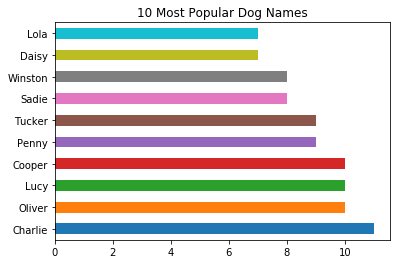

In [44]:
name_counts = pd.value_counts(df_final['name'].values, sort = True)
name_counts.head(10).plot.barh(title = '10 Most Popular Dog Names');

#### Most Common Dog Stage

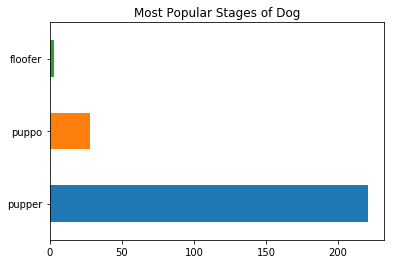

In [54]:
stages = pd.value_counts(df_final['stage'].values, sort = True)
stages.plot.barh(title = 'Most Common Stages of Dog');

#### 10 Most Retweeted Dogs Vs. 10 Most Favorited Dogs

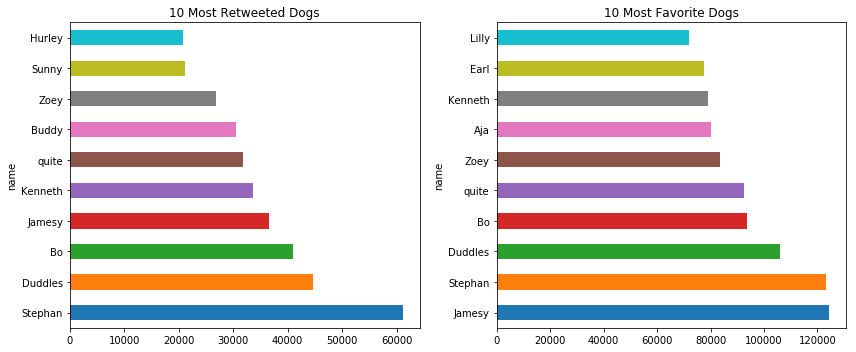

In [138]:
#fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize=(12,5))
df_final.groupby('name').retweet.max().nlargest(10).plot.barh(title = '10 Most Retweeted Dogs',ax=axes[0]);
df_final.groupby('name').favorite.max().nlargest(10).plot.barh(title = '10 Most Favorite Dogs',ax=axes[1]);
plt.tight_layout();

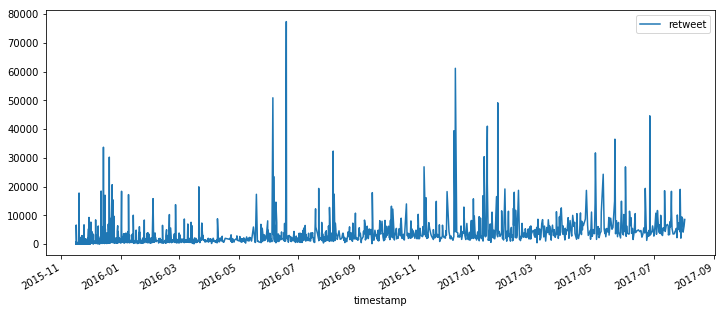

In [139]:
#fig = plt.figure(figsize=(,10))
df_final.plot(x = 'timestamp', y = 'retweet', figsize=(12,5));